In [1]:
#reference split_GEX_to_GEX-ATAC_VAE_dualOutput in WGE_mmJLSAE

In [2]:
#kernel = tf_gpu_ns

#If failes, test seperate recon loss in linear model

In [3]:
# !pip install scanpy
import os
import numpy as np
import pandas as pd
import time
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import backend as K
# from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
import model

In [5]:
# os.listdir('../DATA/')

In [6]:
gex_input_df=pd.read_csv('../DATA/gex_input_824_hvf.csv.gz').set_index('Unnamed: 0')
print(gex_input_df.shape)
gex_data = gex_input_df
# gex_tensor = tf.convert_to_tensor(gex_data, dtype=tf.float32)

(5220, 824)


In [7]:
atac_input_df=pd.read_csv('../DATA/atac_input_3024_hvf.csv.gz').set_index('Unnamed: 0')
print(atac_input_df.shape)
atac_data = atac_input_df

(5220, 3024)


In [8]:
# for step,batch in enumerate(gex_data):
#     print(step)
#     break

In [9]:
X_train_left, X_test_left, y_train_left, y_test_left = train_test_split(gex_data, gex_data, test_size=0.2, random_state=42,shuffle=True)
print(X_train_left.shape)
print(X_test_left.shape)
print(y_train_left.shape)
print(y_test_left.shape)

(4176, 824)
(1044, 824)
(4176, 824)
(1044, 824)


In [10]:
X_train_right=atac_data.loc[X_train_left.index]
X_test_right=atac_data.loc[X_test_left.index]
y_train_right=atac_data.loc[y_train_left.index]
y_test_right=atac_data.loc[y_test_left.index]
print(X_train_right.shape)
print(X_test_right.shape)
print(y_train_right.shape)
print(y_test_right.shape)

(4176, 3024)
(1044, 3024)
(4176, 3024)
(1044, 3024)


In [11]:
# gex_data

In [12]:
###HERES where to set up the train enumerate
batch_size=256

train_dataset_left=tf.data.Dataset.from_tensor_slices(X_train_left)
train_dataset_left = train_dataset_left.shuffle(buffer_size=1024).batch(batch_size)

test_dataset_left = tf.data.Dataset.from_tensor_slices(X_test_left)
test_dataset_left = test_dataset_left.batch(batch_size)

In [13]:
###HERES where to set up the train enumerate
batch_size=256

train_dataset_right=tf.data.Dataset.from_tensor_slices(X_train_right)
train_dataset_right = train_dataset_right.shuffle(buffer_size=1024).batch(batch_size)

test_dataset_right = tf.data.Dataset.from_tensor_slices(X_test_right)
test_dataset_right = test_dataset_right.batch(batch_size)

In [14]:
# for step,batch in enumerate(train_dataset):
#     print(step)
#     break
# batch

In [16]:
vae=model.VAE(X_train_left.shape[1],epochs=3000)


In [18]:
len(X_train_left)/batch_size

16.3125

In [20]:
vae.train_vae(train_dataset_left,train_dataset_right,test_dataset_left,test_dataset_right)


Start of epoch 0


InvalidArgumentError: required broadcastable shapes [Op:Sub]

In [11]:
predictions = vae.predict(X_test)

In [13]:
vae.correlation_accuracy(X_test.to_numpy())
# vae.mse_error(X_train)
vae.mse_error(X_test.to_numpy())

0.4192012463737262
0.8049319311028287


In [14]:
predictions=pd.DataFrame(predictions,columns=X_test.columns,index=X_test.index)
predictions.to_csv('DATA/custom824_pred.csv.gz')

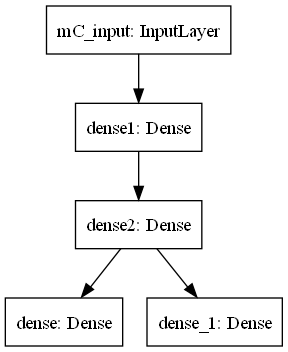

In [15]:
plot_model(vae.encoder)


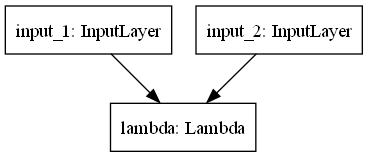

In [16]:
plot_model(vae.sampler)

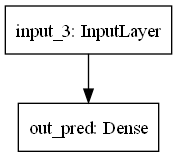

In [17]:
plot_model(vae.decoder)

In [18]:
vae.model_summary()

Encoder Summary:
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mC_input (InputLayer)           [(None, 824)]        0                                            
__________________________________________________________________________________________________
dense1 (Dense)                  (None, 128)          105600      mC_input[0][0]                   
__________________________________________________________________________________________________
dense2 (Dense)                  (None, 64)           8256        dense1[0][0]                     
__________________________________________________________________________________________________
dense (Dense)                   (None, 32)           2080        dense2[0][0]                     
___________________________________________________________________________